<a href="https://colab.research.google.com/github/danbom/ai/blob/main/%EC%A3%BC%EC%84%B1%EB%B6%84%EB%B6%84%EC%84%9D%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 깨짐 문제 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

plt.rc('font', family='NanumBarunGothic')

In [3]:
# 식습관, 운동, 체형
df = pd.DataFrame(columns=['칼로리', '아침', '점심', '저녁', '운동', '체형'])

In [4]:
df.loc[0] = [1200, 1, 0, 0, 2, '마른체형']
df.loc[1] = [2800, 1, 1, 1, 1, '정상체형']
df.loc[2] = [3500, 2, 2, 1, 0, '비만체형']
df.loc[3] = [1400, 0, 1, 0, 3, '마른체형']
df.loc[4] = [5000, 2, 2, 2, 0, '비만체형']
df.loc[5] = [1300, 0, 0, 1, 2, '마른체형']
df.loc[6] = [3000, 1, 0, 1, 1, '정상체형']
df.loc[7] = [4000, 2, 2, 2, 0, '비만체형']
df.loc[8] = [2600, 0, 2, 0, 0, '정상체형']
df.loc[9] = [3000, 1, 2, 1, 1, '비만체형']

In [5]:
df.head(10)

,칼로리,아침,점심,저녁,운동,체형
0,1200,1,0,0,2,마른체형
1,2800,1,1,1,1,정상체형
2,3500,2,2,1,0,비만체형
3,1400,0,1,0,3,마른체형
4,5000,2,2,2,0,비만체형
5,1300,0,0,1,2,마른체형
6,3000,1,0,1,1,정상체형
7,4000,2,2,2,0,비만체형
8,2600,0,2,0,0,정상체형
9,3000,1,2,1,1,비만체형


In [6]:
# X 는 특징 벡터 (feature vectors)
X = df[['칼로리', '아침', '점심', '저녁', '운동']]

In [7]:
# Y 는 labels
Y = df[['체형']]

In [8]:
Y.head(10)

,체형
0,마른체형
1,정상체형
2,비만체형
3,마른체형
4,비만체형
5,마른체형
6,정상체형
7,비만체형
8,정상체형
9,비만체형


In [9]:
x_std = StandardScaler().fit_transform(X)

In [10]:
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [11]:
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


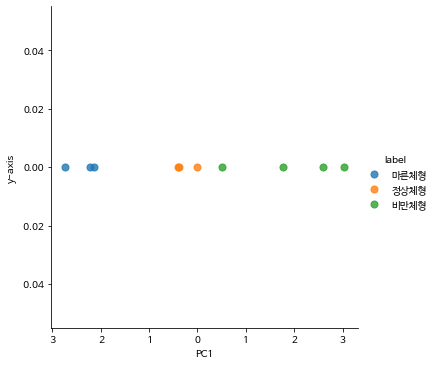

In [12]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False, 
          scatter_kws={"s":50}, hue='label');